In [1]:
import dataTools
import sentimentAnalysis
import os

In [2]:
NDR = "data\\RAW\\ndr\\"
files = dataTools.iter_files(NDR,dataTools.extrText)

coronaskript100.pdf
coronaskript102.pdf
coronaskript104.pdf
coronaskript106.pdf
coronaskript108.pdf
coronaskript110.pdf
coronaskript112.pdf
coronaskript114.pdf
coronaskript116.pdf
coronaskript118.pdf
coronaskript122.pdf
coronaskript124.pdf
coronaskript126.pdf
coronaskript128.pdf
coronaskript130.pdf
coronaskript132.pdf
coronaskript134.pdf
coronaskript136.pdf
coronaskript138.pdf
coronaskript140.pdf
coronaskript142.pdf
coronaskript146.pdf
coronaskript152.pdf
coronaskript154.pdf
coronaskript156.pdf
coronaskript158.pdf
coronaskript160.pdf
coronaskript162.pdf
coronaskript170.pdf
coronaskript172.pdf
coronaskript174.pdf
coronaskript176.pdf
coronaskript178.pdf
coronaskript180.pdf
coronaskript182.pdf
coronaskript184.pdf
coronaskript186.pdf
coronaskript188.pdf
coronaskript190.pdf
coronaskript192.pdf
coronaskript194.pdf
coronaskript196.pdf
coronaskript198.pdf
coronaskript200.pdf
coronaskript202.pdf
coronaskript204.pdf
coronaskript206.pdf
coronaskript208.pdf
coronaskript210.pdf
coronaskript212.pdf


In [3]:
blobs = []
for file in files:
    text = dataTools.performRegEx(file)
    blobs.append(sentimentAnalysis.TextBlobDE(text))

In [6]:
labels = []
polarity = []
subjectivity = []

for blob in blobs[:1]:
    for i, sentence in enumerate(blob.sentences):
        if sentence.sentiment.polarity and sentence.sentiment.subjectivity:
            print(i,sentence,sentence.sentiment.polarity,sentence.sentiment.subjectivity)
            labels.append(str(sentence))
            polarity.append(sentence.sentiment.polarity)
            subjectivity.append(sentence.sentiment.subjectivity)



7 Guten Morgen, Herr  Drosten, sind Sie überhaupt zum Schlafen gekommen? 0.5 0.4
13 Der Fall in Baden-Württemberg ist relativ klar, der am  Niederrhein ist überhaupt nicht klar. 0.16666666666666666 0.26666666666666666
14 Korrina Hennig
Was glauben Sie denn, wie schnell Sie uns vielleicht  mehr erzählen können? 0.35 0.5
23 Und ich muss auch sagen, das hat  mich gar nicht so beunruhigt. -0.5 0.4
24 Also wir sehen natürlich,  dass von diesem italienischen Cluster aus jetzt viel  verschleppt wird innerhalb von Europa. 0.35 0.5
33 Das war ja  auch immer im Zusammenhang mit China thematisiert  worden, dass es hieß, wir wissen gar nicht, ob wir alles  wissen, was wir wissen müssten. -0.5 0.4
38 Und das ist natürlich im Iran, so wie  in vielen anderen Ländern in dieser Region, so, dass  es zwar Labore gibt  — die top nationalen Labore —, die  das können, aber dann gibt es viele andere Labore, die  2/7einfach keinen guten Ausbildungsstand haben. 0.24 0.4
42 In China gibt es natürlich eigens ent

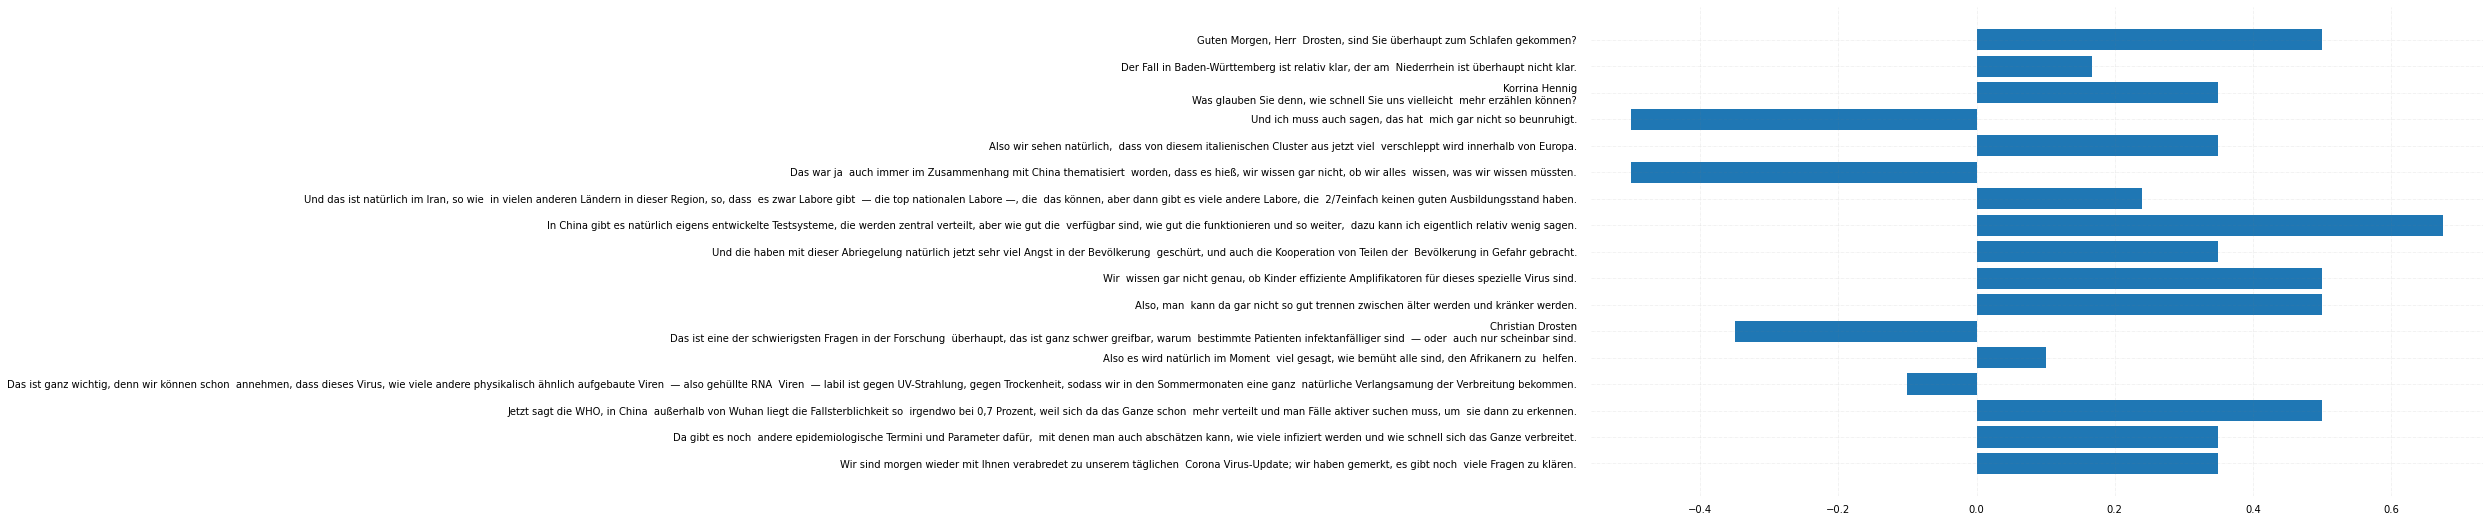

In [5]:
fig, ax = sentimentAnalysis.plt.subplots(figsize=(16,9))

ax.barh(labels, polarity)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()


In [16]:
polarity_sums = []
for blob in blobs:
    polarity_sum = 0
    for i, sentence in enumerate(blob.sentences):
        if sentence.sentiment.polarity and sentence.sentiment.subjectivity:
            polarity_sum += sentence.sentiment.polarity
    polarity_sums.append(polarity_sum)


<BarContainer object of 92 artists>

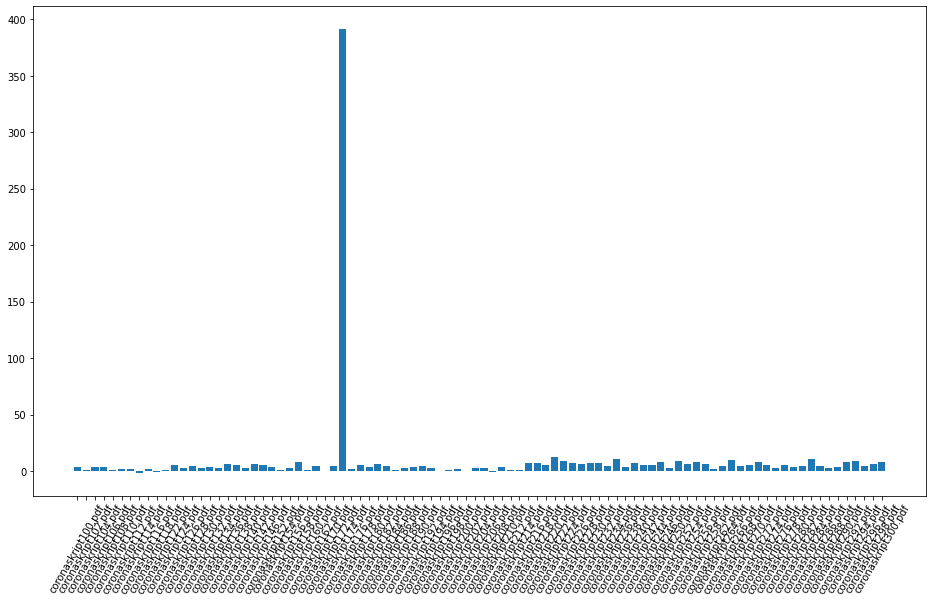

In [31]:

fig, ax = sentimentAnalysis.plt.subplots(figsize=(16,9))

labels = os.listdir("data\\RAW\\ndr")

sentimentAnalysis.plt.xticks(rotation=90)
ax.bar(labels,polarity_sums)